In [1]:
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 15
plt.rcParams["figure.figsize"] = (20, 5)

In [7]:
df = pd.read_csv('../Data/new_weather.csv' )
df.head()

,Unnamed: 0,연월일,기온,품질,균질
0,0,2006/1/1,3.6,8,1
1,1,2006/1/2,4.0,8,1
2,2,2006/1/3,3.7,8,1
3,3,2006/1/4,4.0,8,1
4,4,2006/1/5,3.6,8,1


# 시계열 데이터의 훈련 검증 데이터 나누기
- 시계열 데이터는 순서를 유지해야 의미가 있기에 랜덤으로 섞으면 의미가 없다
- 일반적으로 train,test split을 하지 않는다
- 보통 앞부분 데이터로 훈련을 시키고 뒷부분 데이터로 검증을 한다

In [8]:
y = df['기온'].values
len(y)

4018

In [9]:
y[:20]

array([ 3.6,  4. ,  3.7,  4. ,  3.6,  2.1,  2.8,  4.2,  3.7,  4.3,  6.1,
        6.1,  4. ,  6.6, 10.7,  9. ,  8. ,  5.6,  4.2,  4. ])

In [10]:
ratio = 0.75
cut = np.int(len(y)*ratio)
cut

3013

In [11]:
train = y[:cut]
test = y[cut:]
len(y), len(train)

(4018, 3013)

In [20]:
# split_seq() 사용자 정의 함수
# 시계열 데이터를 테이블 구조로 표현하는 함수
# 매개변수(data,n_Steps)(입력 시계열 데이터, 샘플의 크기)

def split_seq(data,n_steps) :
    x,y = [], []
    for i in range(len(data)) : 
        if i > len(data)-(n_steps+1) : break
        x.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    return np.array(x), np.array(y)

In [21]:
data = [1,2,3,4,5,6,7,8,9,10,11,12,13]
x_train, y_train = split_seq(data,5)
x_train

array([[ 1,  2,  3,  4,  5],
       [ 2,  3,  4,  5,  6],
       [ 3,  4,  5,  6,  7],
       [ 4,  5,  6,  7,  8],
       [ 5,  6,  7,  8,  9],
       [ 6,  7,  8,  9, 10],
       [ 7,  8,  9, 10, 11],
       [ 8,  9, 10, 11, 12]])

In [22]:
pd.DataFrame(list(zip(x_train,y_train)),columns=['x','y'])

,x,y
0,"[1, 2, 3, 4, 5]",6
1,"[2, 3, 4, 5, 6]",7
2,"[3, 4, 5, 6, 7]",8
3,"[4, 5, 6, 7, 8]",9
4,"[5, 6, 7, 8, 9]",10
5,"[6, 7, 8, 9, 10]",11
6,"[7, 8, 9, 10, 11]",12
7,"[8, 9, 10, 11, 12]",13


In [23]:
# 선형 회귀 예측 모델
# 함수
from sklearn.linear_model import LinearRegression

# 모델만들기
lr = LinearRegression() # ()를 넣어주면 lr은 함수(클래스)의 모든 기능을 물려받음

# 과거 10일 기온데이터를 사용해서 내일 기온을 예측하는 경우
# 과거 2-3일치를 확인해도 거의 비슷함
# 바로 내일의 예측은 간단한 문제로 보지만 7일 후, 1달 후는 예측하는 것이 어려운 문제

n_steps = 10

# 훈련데이터
train_x, train_y = split_seq(train,n_steps) # 사용자정의함수

# 검증데이터
test_x, test_y = split_seq(test,n_steps)

In [24]:
len(train_x)

3003

In [26]:
train_x[:3]

array([[3.6, 4. , 3.7, 4. , 3.6, 2.1, 2.8, 4.2, 3.7, 4.3],
       [4. , 3.7, 4. , 3.6, 2.1, 2.8, 4.2, 3.7, 4.3, 6.1],
       [3.7, 4. , 3.6, 2.1, 2.8, 4.2, 3.7, 4.3, 6.1, 6.1]])

In [27]:
lr.fit(train_x,train_y)

LinearRegression()

In [29]:
# 성능평가 :  회귀에서는 디폴트로 R-squared 점수를 알려줌
lr.score(test_x,test_y).round(4)

0.936

In [35]:
# 실제값과 예측값 비교
y_pred = lr.predict(test_x)
y_pred[:3] # [12.62985193, 14.71212449, 14.07852478]

array([12.62985193, 14.71212449, 14.07852478])

In [38]:
pd.DataFrame({'test_y : ', test_y[:40], 'predict_y : ', y_pred[:40]})

TypeError: unhashable type: 'numpy.ndarray'

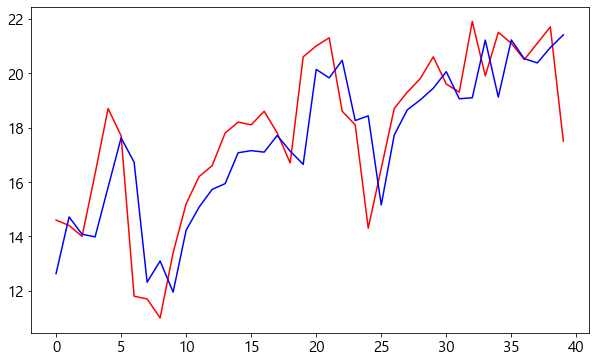

In [37]:
plt.figure(figsize=[10,6])
plt.plot(test_y[:40],c='r')
plt.plot(y_pred[:40],c='b')
plt.show()

In [39]:
lr.coef_

array([ 0.04199142,  0.03098722,  0.00984958,  0.04929182,  0.03011167,
        0.04455212,  0.00230516,  0.11047411, -0.16003639,  0.82663927])